# Multiple Subplots

A veces resulta útil comparar diferentes vistas de datos una al lado de la otra.
Para ello, Matplotlib cuenta con el concepto de **subplots**: grupos de ejes más pequeños que pueden existir juntos dentro de una sola figura.
Estas subparcelas pueden ser recuadros, cuadrículas de gráficos u otros diseños más complicados.
En esta sección, exploraremos cuatro rutinas para crear subparcelas en Matplotlib.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

## ``plt.axes``: Subplots by Hand

El método más básico para crear ejes es utilizar la función ``plt.axes``.
Como hemos visto anteriormente, de forma predeterminada, esto crea un objeto de ejes estándar que llena toda la figura.
``plt.axes`` también acepta un argumento opcional que es una lista de cuatro números en el sistema de coordenadas de la figura.
Estos números representan ``[izquierda, inferior, ancho, alto]`` en el sistema de coordenadas de la figura, que va desde 0 en la parte inferior izquierda de la figura hasta 1 en la parte superior derecha de la figura.

Por ejemplo, podríamos crear ejes insertados en la esquina superior derecha de otros ejes estableciendo la posición **x** e **y** en 0,65 (es decir, comenzando en el 65 % del ancho y el 65 % de la altura de la figura) y las extensiones **x** e **y** en 0,2 (es decir, el tamaño de los ejes es el 20 % del ancho y el 20 % de la altura de la figura):

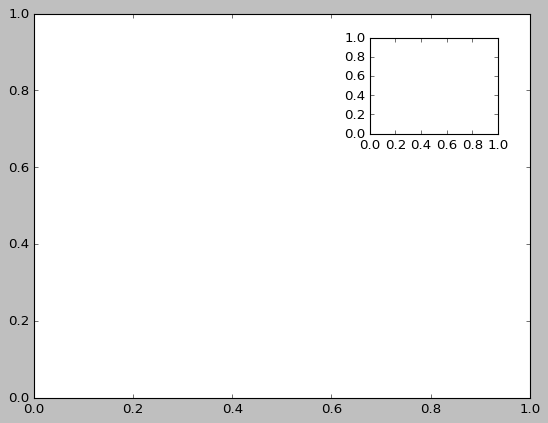

In [5]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

El equivalente de este comando dentro de la interfaz orientada a objetos es ``fig.add_axes()``. Usémoslo para crear dos ejes apilados verticalmente:

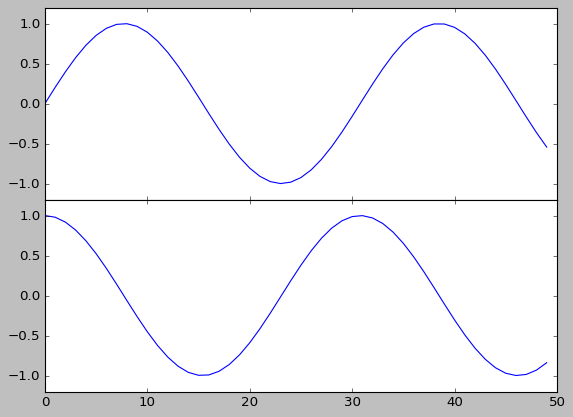

In [8]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

Ahora tenemos dos ejes (el superior sin etiquetas de verificación) que apenas se tocan: la parte inferior del panel superior (en la posición 0,5) coincide con la parte superior del panel inferior (en la posición 0,1 + 0,4).

## ``plt.subplot``: Simple Grids of Subplots

Las columnas o filas alineadas de subparcelas son una necesidad bastante común, por lo que Matplotlib tiene varias rutinas convenientes que facilitan su creación.
El nivel más bajo de estas es ``plt.subplot()``, que crea una sola subparcela dentro de una cuadrícula.
Como puede ver, este comando toma tres argumentos enteros: **la cantidad de filas**, **la cantidad de columnas** y **el índice** de la parcela que se creará en este esquema, que va desde la esquina superior izquierda hasta la esquina inferior derecha:

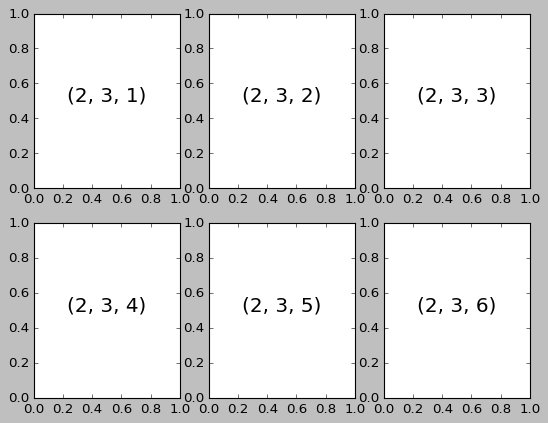

In [9]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

El comando ``plt.subplots_adjust`` se puede utilizar para ajustar el espaciado entre estos gráficos.
El código siguiente utiliza el comando orientado a objetos equivalente, ``fig.add_subplot()``:

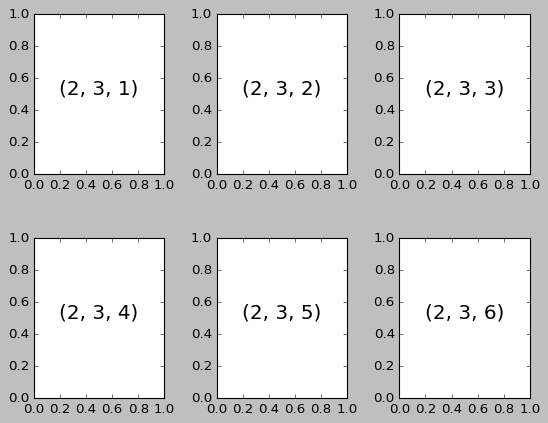

In [10]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

Hemos utilizado los argumentos ``hspace`` y ``wspace`` de ``plt.subplots_adjust``, que especifican el espaciado a lo largo de la altura y el ancho de la figura, en unidades del tamaño de la subparcela (en este caso, el espacio es el 40% de la altura y el ancho de la subparcela).

## ``plt.subplots``: The Whole Grid in One Go

El enfoque que acabamos de describir puede resultar bastante tedioso al crear una gran cuadrícula de subparcelas, especialmente si desea ocultar las etiquetas de los ejes x e y en las gráficas internas.
Para este propósito, ``plt.subplots()`` es la herramienta más fácil de usar (observe la ``s`` al final de ``subplots``). En lugar de crear una única subparcela, esta función crea una cuadrícula completa de subparcelas en una única línea y las devuelve en una matriz NumPy.
Los argumentos son el **número de filas** y el **número de columnas**, junto con las palabras clave opcionales ``sharex`` y ``sharey``, que le permiten especificar las relaciones entre los diferentes ejes.

Aquí crearemos una cuadrícula de $2 \times 3$ subparcelas, donde todos los ejes de la misma fila comparten su escala del eje y, y todos los ejes de la misma columna comparten su escala del eje x:

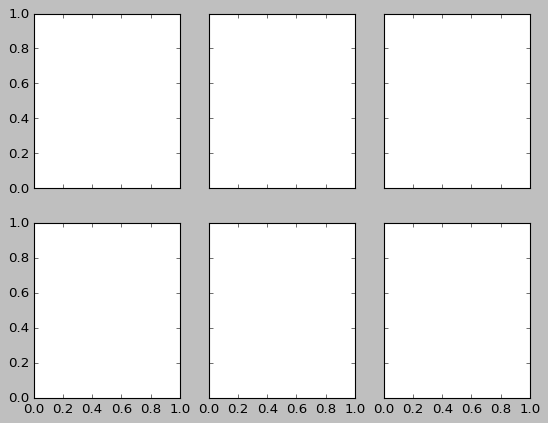

In [12]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')


Tenga en cuenta que al especificar ``sharex`` y ``sharey``, eliminamos automáticamente las etiquetas internas de la cuadrícula para que el gráfico sea más claro.
La cuadrícula resultante de instancias de ejes se devuelve dentro de una matriz NumPy, lo que permite una especificación conveniente de los ejes deseados utilizando la notación de indexación de matrices estándar:

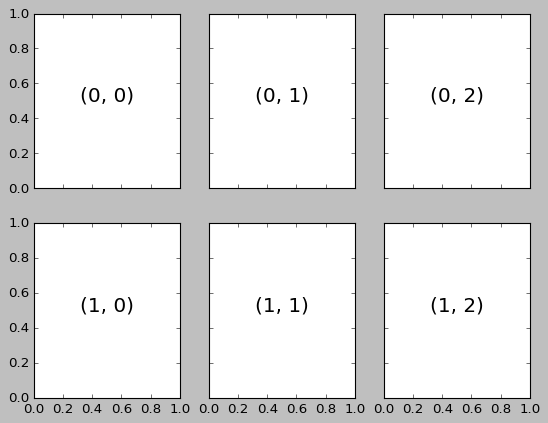

In [13]:
# Los ejes están en una matriz bidimensional, indexados por [fila, columna]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

En comparación con ``plt.subplot()``, ``plt.subplots()`` es más consistente con la indexación convencional basada en 0 de Python.

## ``plt.GridSpec``: More Complicated Arrangements

Para ir más allá de una cuadrícula regular y crear subgráficos que abarcan varias filas y columnas, ``plt.GridSpec()`` es la mejor herramienta.
El objeto ``plt.GridSpec()`` no crea un gráfico por sí mismo; es simplemente una interfaz conveniente que reconoce el comando ``plt.subplot()``.
Por ejemplo, una especificación de cuadrícula para una cuadrícula de dos filas y tres columnas con un espacio de ancho y alto especificado se ve así:

In [18]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

A partir de esto, podemos especificar las ubicaciones y extensiones de las subparcelas utilizando la sintaxis de corte habitual de Python:

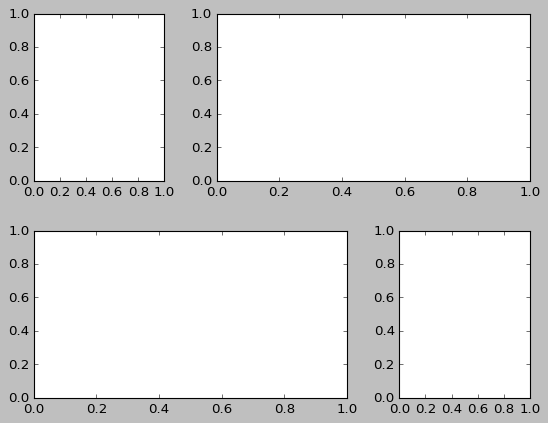

In [19]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

Este tipo de alineación de cuadrícula flexible tiene una amplia gama de usos.
La uso con más frecuencia al crear gráficos de histogramas de varios ejes como los que se muestran aquí:

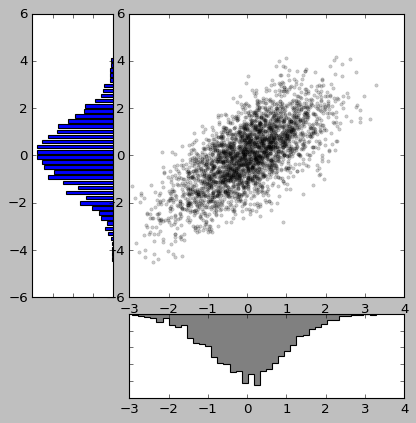

In [20]:
# Crea algunos datos distribuidos normalmente
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Configurar los ejes con gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[0:-1, 1:4])
y_hist = fig.add_subplot( grid[0:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot( grid[-1 , 1:4], yticklabels=[], sharex=main_ax)

# puntos de dispersión en los ejes principales
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histograma en los ejes adjuntos
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='barstacked',
            orientation='horizontal',rwidth=0.7)
y_hist.invert_xaxis()